A practice project

In [16]:
#importing pandas
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
#reading the dataset into a dataframe using pandas
df = pd.read_csv("suv_data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [19]:
df.shape

(400, 5)

In [20]:
#trying to get the datatypes the column were stored with 
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [21]:
#trying to get whether 
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

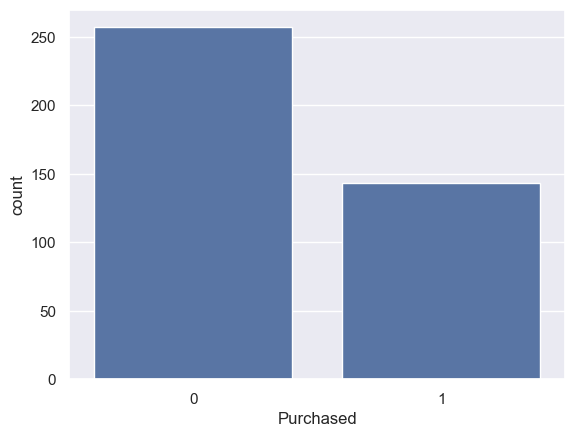

In [23]:
#plotting a pie chart for the purchased column

sns.set_theme(style="darkgrid")
sns.countplot(x="Purchased", data=df)
plt.show()

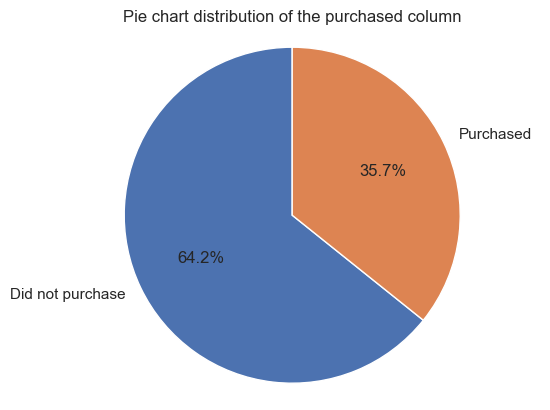

In [24]:
# Add a label to the pie chart where 0 represents "did not purchase" while 1 is "purchased"
labels = ['Did not purchase', 'Purchased']
sizes = df['Purchased'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Pie chart distribution of the purchased column")
plt.show()

In [25]:
highest_salary = df['EstimatedSalary'].max()
highest_salary  

150000

In [26]:
df['Gender'] = df['Gender'].replace({"Male": 0, "Female": 1})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [27]:
corr_matrix = df.corr()['Purchased']
corr_matrix

User ID            0.007120
Gender             0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

In [28]:
#model building and testing
X = df.drop(columns='Purchased')
y = df['Purchased']
X.head(5)

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000


In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' and 'y' are defined as in the previous code
selector = RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=None)
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['Age', 'EstimatedSalary'], dtype='object')


In [30]:
#we can see that the features to use is just age and estimated salary, lets now put it in a dataframe
X = X.drop(columns=(['User ID', 'Gender']), axis=1)
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
print("all imported")

all imported


In [32]:
models = [RandomForestClassifier(random_state=0),
          GradientBoostingClassifier(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          LogisticRegression(max_iter=500)
          ]
for model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    mean_cv_score = sum(cv_score)/len(cv_score)
    percentage_mean_cv_score = round((mean_cv_score*100), 2)
    print(f"The CV score for {model} is {percentage_mean_cv_score} %")
    print('..........................................................')

The CV score for RandomForestClassifier(random_state=0) is 85.0 %
..........................................................
The CV score for GradientBoostingClassifier() is 85.25 %
..........................................................
The CV score for KNeighborsClassifier() is 76.75 %
..........................................................
The CV score for DecisionTreeClassifier() is 80.5 %
..........................................................
The CV score for LogisticRegression(max_iter=500) is 82.75 %
..........................................................


In [33]:
#we can see that RandomForestClassifier has the highest CV score, so we are going to train our data with it
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#checking accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy of the model is {round(accuracy * 100, 2)}%")


The accuracy of the model is 92.5%


In [34]:
#using classification report
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.87      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40



In [35]:
import numpy as np
random_age = np.random.randint(df['Age'].min(), df['Age'].max())
random_salary = np.random.randint(df['EstimatedSalary'].min(), df['EstimatedSalary'].max())
random_data = np.array([[random_age, random_salary]])
prediction = model.predict(random_data)
if prediction == 0:
    print('The customer will not buy the car')
else:
    print('The customer will buy the car')

The customer will not buy the car


In [36]:

random_age = 45
random_salary = 150000
random_data = np.array([[random_age, random_salary]])
prediction = model.predict(random_data)
if prediction == 0:
    print('The customer will not buy the car')
else:
    print('The customer will buy the car')

The customer will buy the car
